In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
df_helper = pd.read_csv('helper.csv', index_col=[0])

In [ ]:
df_helper.head(5)

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount
0,67203,9.92,126817,19649,207436,9103
1,33583,9.93,68880,4442,52340,2890
2,26578,9.94,46558,2799,58784,3905
3,28086,9.96,60027,3870,66562,3057
4,18451,9.93,31936,3235,51215,4162


In [ ]:
df_helper['pathyTotalCount'] = df_helper['sympathyCount'] + df_helper['antipathyCount']
df_helper.head(1)

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount,pathyTotalCount
0,67203,9.92,126817,19649,207436,9103,216539


In [ ]:
df_helper['antiOverSym'] = df_helper['antipathyCount'] / df_helper['sympathyCount']
df_helper.head(1)

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount,pathyTotalCount,antiOverSym
0,67203,9.92,126817,19649,207436,9103,216539,0.043883


In [ ]:
df_helper['antiOverSym'] = df_helper['antiOverSym'].round(3) * 100

In [ ]:
df_helper['antiOverSym'] = df_helper['antiOverSym'].astype(int)

In [ ]:
df_helper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   likeItCount          297 non-null    int64  
 1   topPointTotalNumber  297 non-null    float64
 2   topTotalStarPoint    297 non-null    int64  
 3   commentCount         297 non-null    int64  
 4   sympathyCount        297 non-null    int64  
 5   antipathyCount       297 non-null    int64  
 6   pathyTotalCount      297 non-null    int64  
 7   antiOverSym          297 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 20.9 KB


In [ ]:
df_helper.rename(columns = {'antiOverSym': 'antiOverSymPerc'}, inplace=True)

In [ ]:
df_helper.columns

Index(['likeItCount', 'topPointTotalNumber', 'topTotalStarPoint',
       'commentCount', 'sympathyCount', 'antipathyCount', 'pathyTotalCount',
       'antiOverSymPerc'],
      dtype='object')

In [ ]:
df_helper.head(1)

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount,pathyTotalCount,antiOverSymPerc
0,67203,9.92,126817,19649,207436,9103,216539,4


In [ ]:
sns.set(rc = {'figure.figsize':(12,6)})

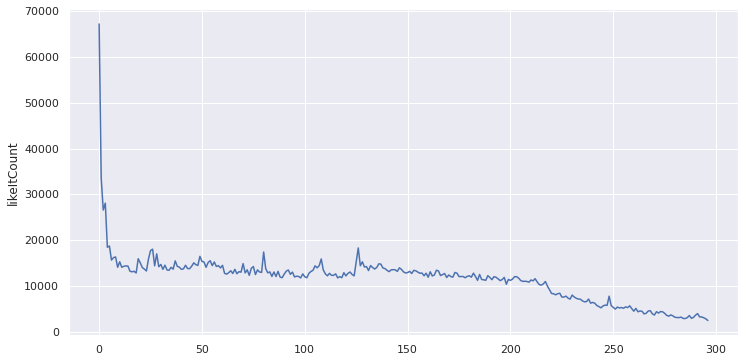

In [ ]:
sns.lineplot(data=df_helper.likeItCount)

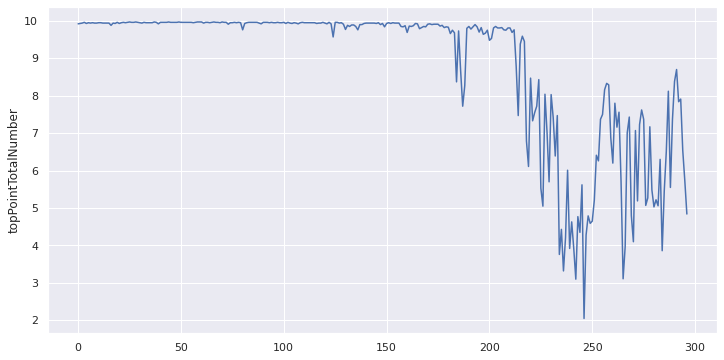

In [ ]:
sns.lineplot(data=df_helper.topPointTotalNumber)

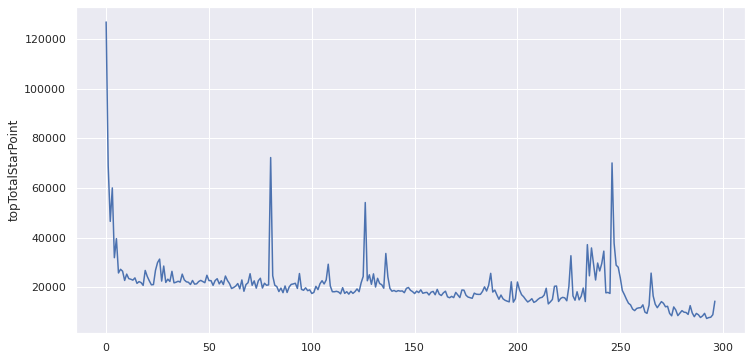

In [ ]:
sns.lineplot(data=df_helper.topTotalStarPoint)

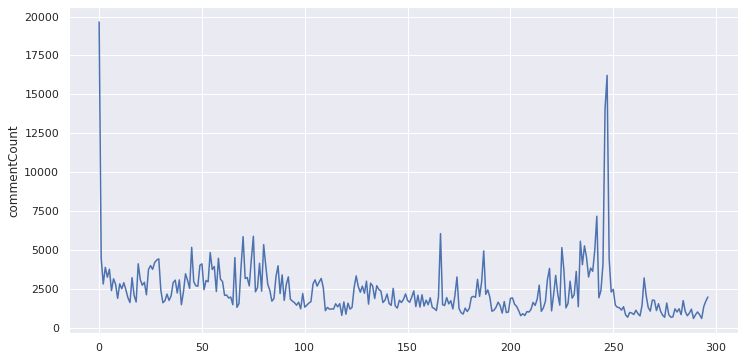

In [ ]:
sns.lineplot(data=df_helper.commentCount)

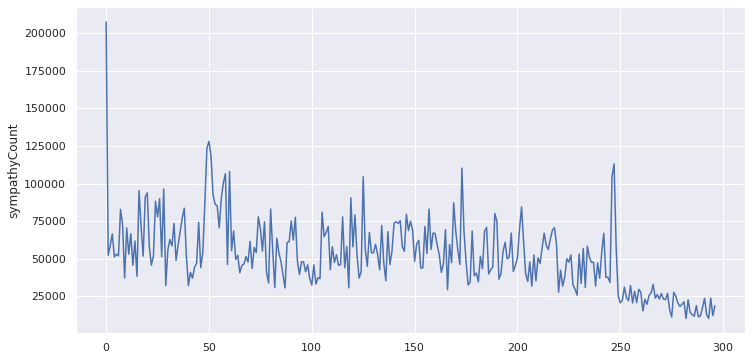

In [ ]:
sns.lineplot(data=df_helper.sympathyCount)

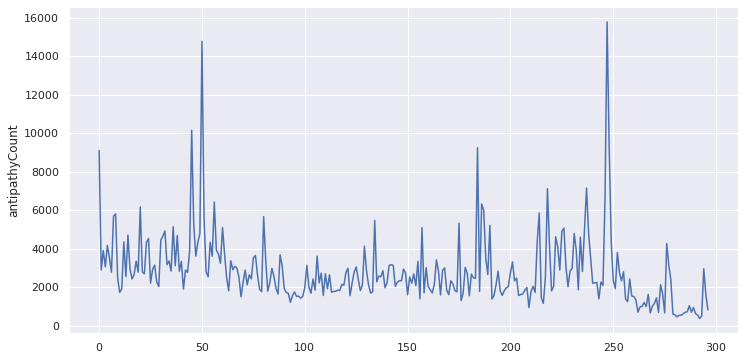

In [ ]:
sns.lineplot(data=df_helper.antipathyCount)

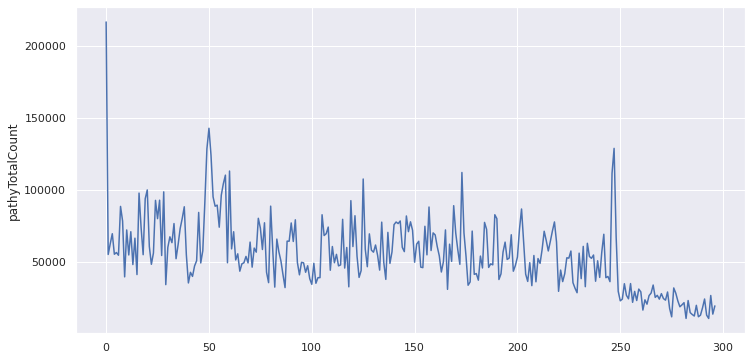

In [ ]:
sns.lineplot(data=df_helper.pathyTotalCount)

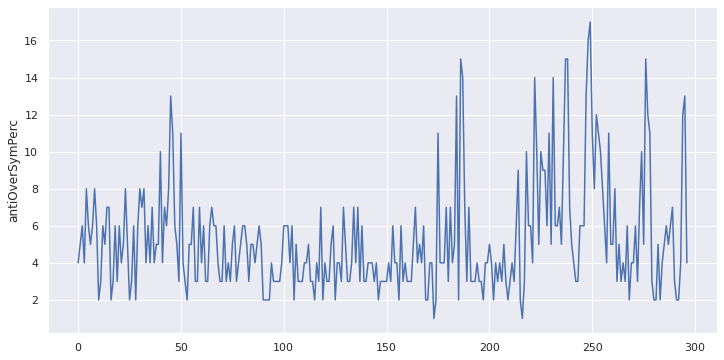

In [ ]:
sns.lineplot(data=df_helper.antiOverSymPerc)

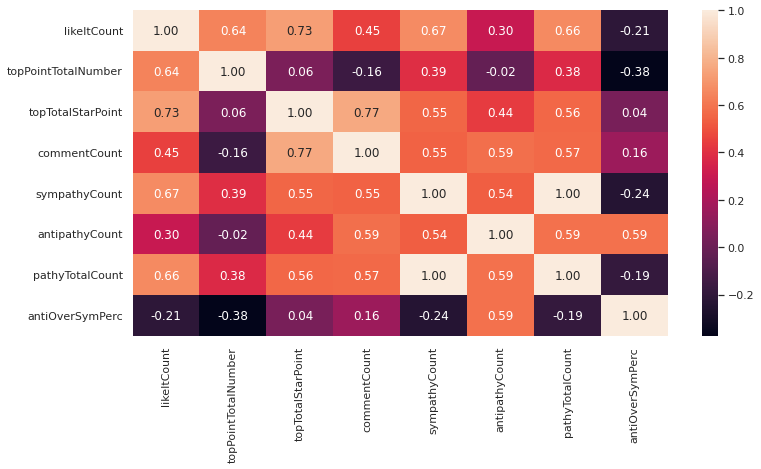

In [ ]:
sns.heatmap(data=df_helper.corr(), annot=True, fmt='.2f')

In [ ]:
# normalization_df = (df - df.mean())/df.std()
# normalization_df.head()

In [ ]:
# df_1 = df_helper[:]
# df_1 = (df_1 - df_1.mean())/df_1.std()
# sns.heatmap(data=df_1.corr(), annot=True)

In [ ]:
# 웹툰 헬퍼의 베스트 댓글의 비공감수 총합:공감수 총합 비율이 높아질 수록 웹툰의 평점은 낮아진다.

In [ ]:
# 웹툰 헬퍼의 회차별 비공감-공감 비율을 정수형 퍼센트로 바꿔 유니크값을 추려냄
df_helper['antiOverSymPerc'].unique()

array([ 4,  5,  6,  8,  2,  3,  7, 10, 13, 11,  1, 15, 14,  9, 16, 17, 12])

In [ ]:
pathyStarPointRelation = df_helper.groupby('antiOverSymPerc')['topPointTotalNumber'].mean()

In [ ]:
aa = df_helper['antiOverSymPerc'] == 17
df_helper[aa]

,likeItCount,topPointTotalNumber,topTotalStarPoint,commentCount,sympathyCount,antipathyCount,pathyTotalCount,antiOverSymPerc
249,5698,4.59,28106,2285,25314,4369,29683,17


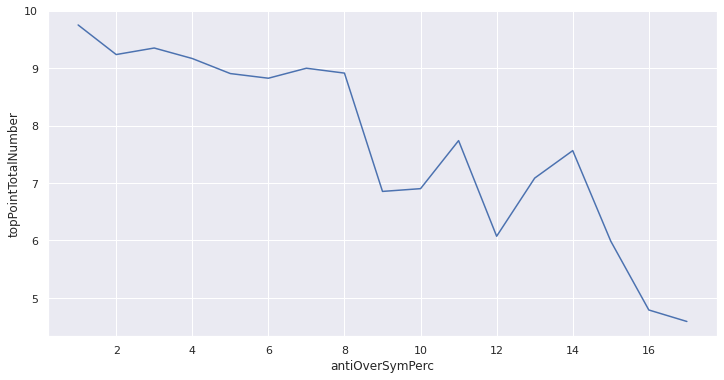

In [ ]:
sns.lineplot(data=pathyStarPointRelation)

In [ ]:
symPerTotalPathy = (df_helper['sympathyCount']/df_helper['pathyTotalCount'])*100
newScore = df_helper['topPointTotalNumber'] * symPerTotalPathy / 10

# print('댓점수의 평균', symPerTotalPathy.mean())
# print('댓점수의 중앙값', symPerTotalPathy.median())
# print('댓점수의 최대값', symPerTotalPathy.max())
# print('댓점수의 최소값', symPerTotalPathy.min())
symPerTotalPathy.describe()
# print('파랑은 뉴스코어')
# print('노랑은 평점')
# sns.lineplot(data=newScore)
# sns.lineplot(data=df_helper['topPointTotalNumber'] * 10)

count    297.000000
mean      94.678239
std        2.544265
min       85.281137
25%       93.730333
50%       95.367682
75%       96.473962
max       98.376536
dtype: float64

In [ ]:
df_helper.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 296
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   likeItCount          297 non-null    int64  
 1   topPointTotalNumber  297 non-null    float64
 2   topTotalStarPoint    297 non-null    int64  
 3   commentCount         297 non-null    int64  
 4   sympathyCount        297 non-null    int64  
 5   antipathyCount       297 non-null    int64  
 6   pathyTotalCount      297 non-null    int64  
 7   antiOverSymPerc      297 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 20.9 KB


In [ ]:
sns.lineplot(data=s)
sns.lineplot(data=df_helper.topPointTotalNumber)

NameError: ignored